<a href="https://colab.research.google.com/github/bitmos/Python-/blob/master/Naive%20and%20KNN%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>
(418, 11)


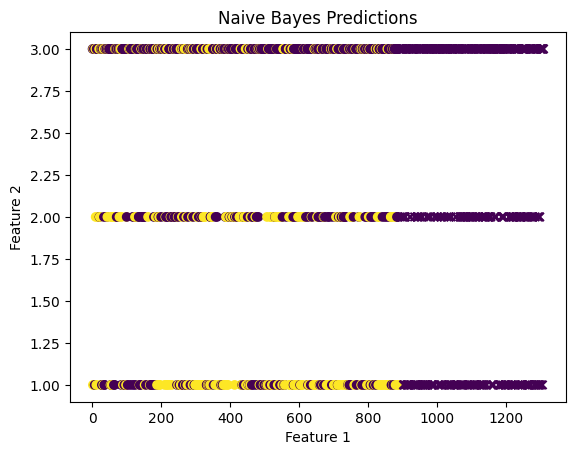

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class NaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.feature_probs = None

    def fit(self, x_train, y_train):
        # Calculate class probabilities
        classes = np.unique(y_train)
        self.class_probs = {}
        for cls in classes:
            self.class_probs[cls] = np.sum(y_train == cls) / len(y_train)

        # Calculate feature probabilities
        self.feature_probs = {}
        for feature_idx in range(x_train.shape[1]):
            self.feature_probs[feature_idx] = {}
            unique_values = np.unique(x_train[:, feature_idx])
            for value in unique_values:
                self.feature_probs[feature_idx][value] = {}
                for cls in classes:
                    numerator = np.sum((x_train[:, feature_idx] == value) & (y_train == cls))
                    denominator = np.sum(y_train == cls)
                    self.feature_probs[feature_idx][value][cls] = numerator / denominator

    def predict(self, x_test):
        predictions = []
        for sample in x_test:
            max_prob = -1
            max_cls = None
            for cls in self.class_probs:
                prob = self.class_probs[cls]
                for feature_idx, value in enumerate(sample):
                    if value in self.feature_probs[feature_idx]:
                        prob *= self.feature_probs[feature_idx][value][cls]
                if prob > max_prob:
                    max_prob = prob
                    max_cls = cls
            predictions.append(max_cls)
        return np.array(predictions)


# Testing the NaiveBayes class

# Create a toy dataset
df = pd.read_csv("/content/train.csv")

df = df.apply(pd.to_numeric, errors='coerce')


# Split features and output
a = df.drop("Survived", axis=1)
x_train = a.iloc[:, :].values

y_train = df[['Survived']].values
print(type(y_train))
# Create test data
x_test = pd.read_csv("/content/test.csv")
x_test = x_test.iloc[:, :].values
# Create NaiveBayes object
nb = NaiveBayes()
print(x_test.shape)
# Fit the model to training data
nb.fit(x_train, y_train)

# Make predictions on test data
predictions = nb.predict(x_test)

# Visualize the predictions
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], c=predictions, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Predictions')
plt.show()

print("Predictions:", predictions)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = []
        for test_sample in x_test:
            distances = []
            for train_sample, label in zip(self.x_train, self.y_train):
                distance = self.euclidean_distance(test_sample, train_sample)
                distances.append((distance, label))
            distances.sort()
            k_nearest = distances[:self.k]
            k_nearest_labels = [label for _, label in k_nearest]
            prediction = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(prediction)
        return np.array(predictions)


# Testing the KNN class

# Create a toy dataset

df = pd.DataFrame(data)

# Split features and output
x_train = df[['feature1', 'feature2']].values
y_train = df['output'].values

# Create test data
x_test = np.array([[1, 0], [0, 1]])

# Create KNN object
knn = KNN(k=3)

# Fit the model to training data
knn.fit(x_train, y_train)

# Make predictions on test data
predictions = knn.predict(x_test)

# Visualize the predictions
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], c=predictions, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Predictions')
plt.show()

print("Predictions:", predictions)


KeyError: ignored